# Prerequisite

In [16]:
!pip install markov_clustering

# Import Libraries


In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import markov_clustering as mc
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans

# Generate Network

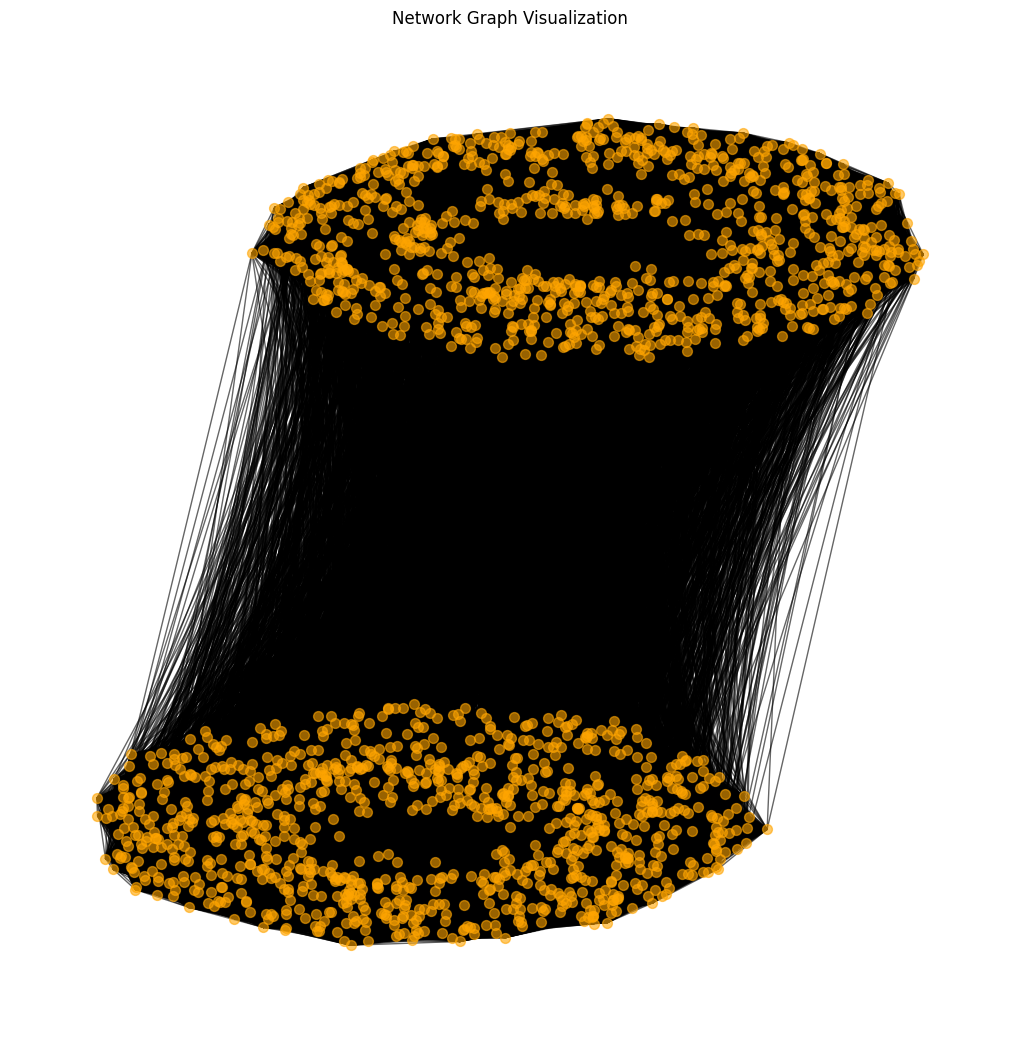

Large Cluster 0, Small Cluster 0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
Large Cluster 0, Small Cluster 1: [99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197]
Large Cluster 0, Small Cluster 2: [198, 199, 200, 

In [18]:
# Parameters
XXX = 990  # Last 3 digits in ID
X = 0  # last digit in ID
N = 1000 + XXX
K = 2 + X
small_clusters_per_large_cluster = 10 + X
P_general = 10 / N  # Correct edge probability for the general graph
P_large = 0.5  # Correct edge probability within large clusters
P_small = 0.9  # Correct edge probability within small clusters

# Initialize graph
G = nx.Graph()

# Dictionary to store small clusters
small_clusters_dict = {}

# Add nodes
G.add_nodes_from(range(N))

# Add edges for general connectivity
for i in range(N):
    for j in range(i + 1, N):
        if np.random.rand() < P_general:
            G.add_edge(i, j)

# Add edges within large clusters
large_cluster_size = N // K
for k in range(K):
    start = k * large_cluster_size
    end = start + large_cluster_size
    for i in range(start, end):
        for j in range(i + 1, end):
            if np.random.rand() < P_large:
                G.add_edge(i, j)

    # Add edges within small clusters and track them in the dictionary
    small_cluster_size = large_cluster_size // small_clusters_per_large_cluster
    for l in range(small_clusters_per_large_cluster):
        s_start = start + l * small_cluster_size
        s_end = s_start + small_cluster_size
        small_cluster_nodes = list(range(s_start, s_end))
        small_clusters_dict[(k, l)] = small_cluster_nodes

        for i in range(s_start, s_end):
            for j in range(i + 1, s_end):
                if np.random.rand() < P_small:
                    G.add_edge(i, j)

# Visualization
plt.figure(figsize=(10, 10))  # Set figure size to 10x10 inches
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, node_size=50, with_labels=False, node_color='orange', alpha=0.6)
plt.title("Network Graph Visualization")
plt.show()

# Example usage: Access small clusters
for (large_cluster_idx, small_cluster_idx), nodes in small_clusters_dict.items():
    print(f"Large Cluster {large_cluster_idx}, Small Cluster {small_cluster_idx}: {nodes}")



In [19]:
# # Save the graph to a .net file
# nx.write_pajek(G, "network_output.net")

# Markov Clustering Algorithm


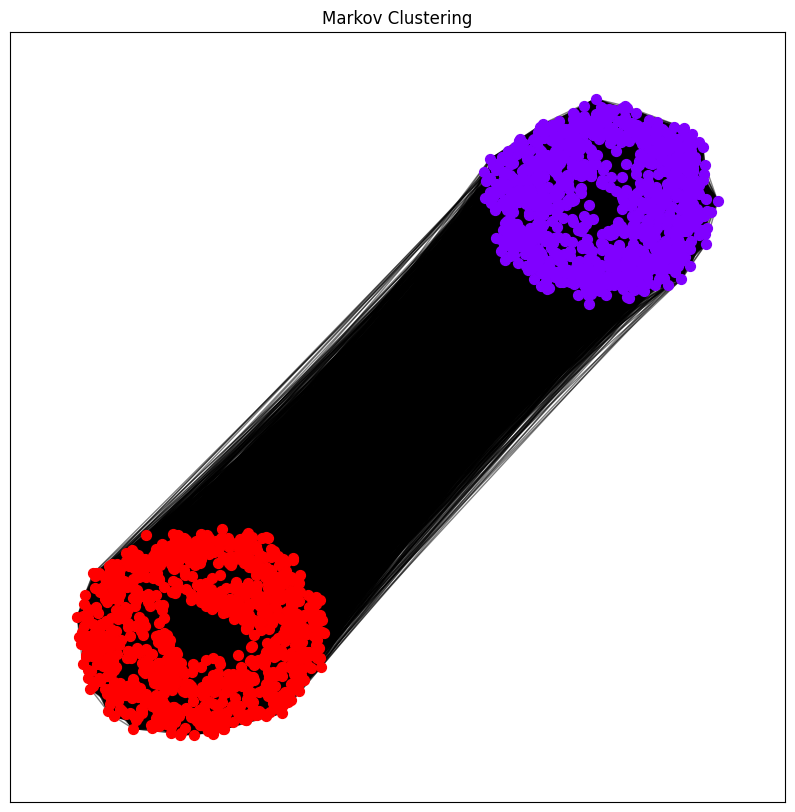

In [20]:
# ----------------------------------------------------- MARKOV -----------------------------------------------------
# Convert the NetworkX graph to a sparse matrix (adjacency matrix)
adj_matrix = nx.adjacency_matrix(G)  # This should ensure a proper 2D matrix

# Convert to a dense format if necessary
adj_matrix = adj_matrix.todense()

# Perform Markov Clustering
result = mc.run_mcl(adj_matrix, inflation=1.6)  # You can experiment with the inflation parameter

# Get the clusters
clusters = mc.get_clusters(result)

# # Print the clusters
# for i, cluster in enumerate(clusters):
#     print(f"Cluster {i + 1}: {cluster}")

# # Optionally, save the clusters to a file
# with open("clusters.txt", "w") as f:
#     for i, cluster in enumerate(clusters):
#         f.write(f"Cluster {i + 1}: {cluster}\n")

# Visualize the clustered graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
colors = plt.cm.rainbow(np.linspace(0, 1, len(clusters)))

for cluster, color in zip(clusters, colors):
    nx.draw_networkx_nodes(G, pos, nodelist=cluster, node_color=[color], node_size=50)

nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Markov Clustering")
plt.show()

### Run markov for each cluster ==================================================



# Sub-Clustering large clusters with K-Means

### Entire network

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Large Cluster 0 produced 10 subclusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Large Cluster 1 produced 10 subclusters.


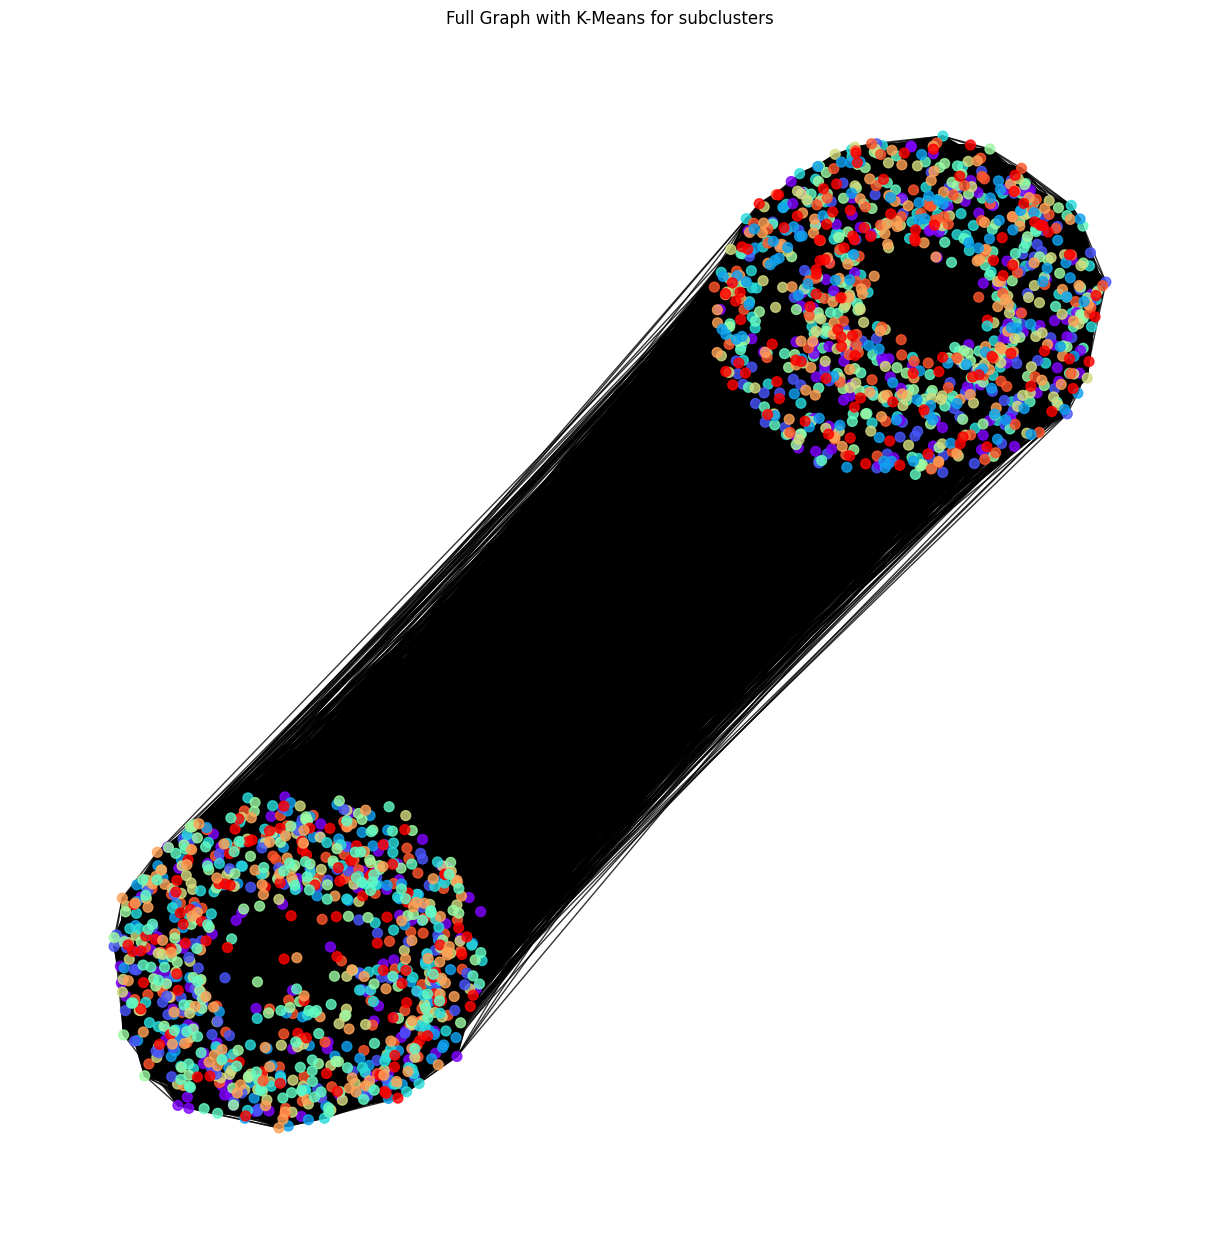

In [21]:

# Create the color map for visualization
color_map = {}

# Iterate over each large cluster
for large_cluster_idx, large_cluster_nodes in enumerate(clusters):
    # Create a subgraph for the large cluster
    large_subgraph = G.subgraph(large_cluster_nodes).copy()

    # Convert the subgraph to a sparse matrix (adjacency matrix)
    adj_matrix = nx.adjacency_matrix(large_subgraph).toarray()

    # Apply Spectral Clustering to find 10 subclusters
    clustering = KMeans(n_clusters=10, random_state=42)
    labels = clustering.fit_predict(adj_matrix)

    print(f"Large Cluster {large_cluster_idx} produced {len(set(labels))} subclusters.")

    # Assign colors to each subcluster
    colors = plt.cm.rainbow(np.linspace(0, 1, len(set(labels))))
    for node, label in zip(large_subgraph.nodes(), labels):
        color_map[node] = colors[label]

# Visualize the full graph with nodes colored by their subcluster membership
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # You can choose any layout
nx.draw(G, pos, node_color=[color_map[node] for node in G.nodes()], node_size=50, with_labels=False, alpha=0.8)
plt.title("Full Graph with K-Means for subclusters")
plt.show()

### Large clusters separately

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


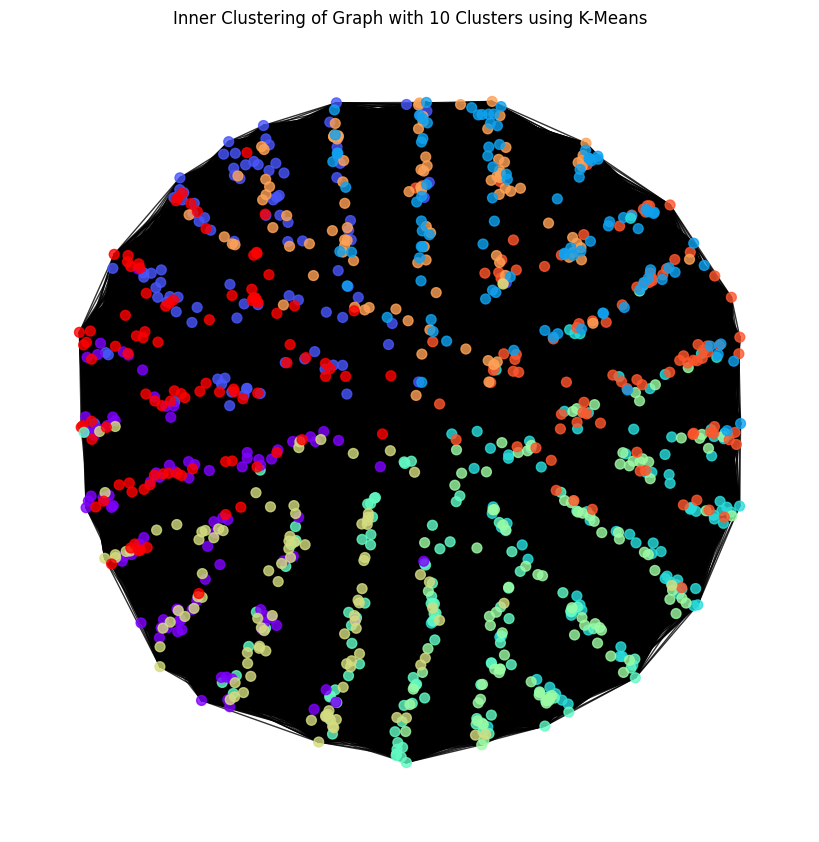

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


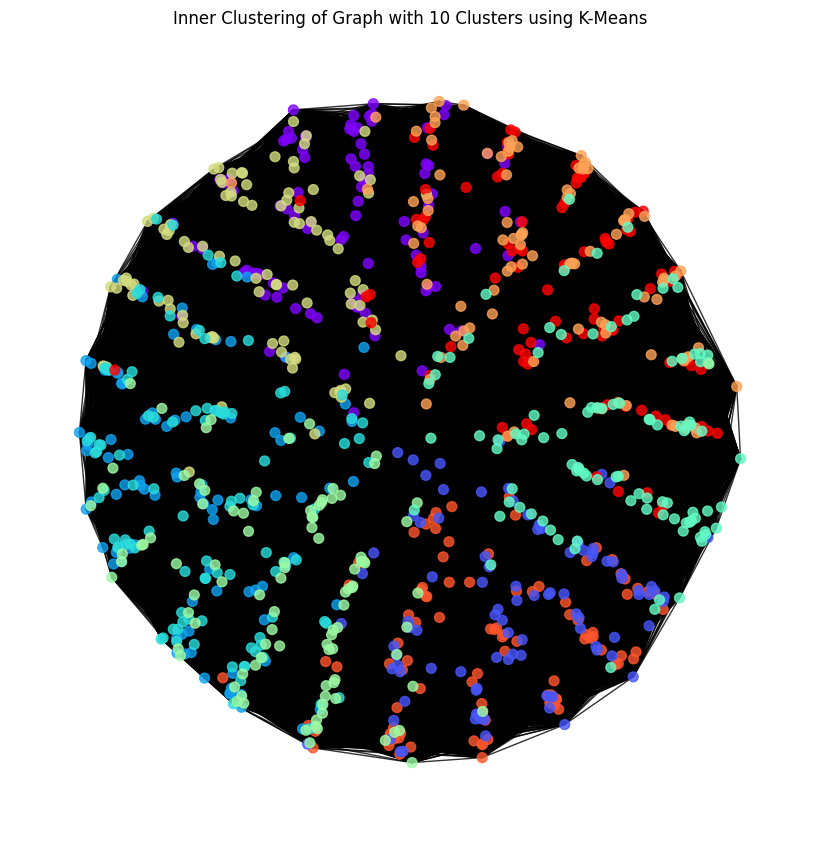

In [24]:
# new implementation which clusters the nodes within the 2 bigger clusters
G1_nodes = clusters[0]  # Nodes in the first large cluster
G2_nodes = clusters[1]  # Nodes in the second large cluster

# Create subgraphs for G1 and G2
G1 = G.subgraph(G1_nodes).copy()
G2 = G.subgraph(G2_nodes).copy()

# Function to perform inner clustering and visualize
def inner_clustering_and_visualize(G, num_clusters=10):
    # Create the adjacency matrix
    adj_matrix = nx.adjacency_matrix(G).toarray()

    clustering_model = KMeans(n_clusters=num_clusters, random_state=42)

    # Apply clustering
    labels = clustering_model.fit_predict(adj_matrix)

    # Assign colors to clusters
    colors = plt.cm.rainbow(np.linspace(0, 1, num_clusters))
    color_map = {node: colors[labels[i]] for i, node in enumerate(G.nodes())}

    # Visualize the graph with clusters
    plt.figure(figsize=(8, 8))
    # pos = nx.spring_layout(G)
    # pos = nx.spring_layout(G, k=0.1, iterations=100)
    pos = nx.spring_layout(G, k=0.05, iterations=200, scale=1.5)
    nx.draw(G, pos, node_color=[color_map[node] for node in G.nodes()], node_size=50, with_labels=False, alpha=0.8)
    plt.title(f"Inner Clustering of Graph with {num_clusters} Clusters using K-Means")
    plt.show()

# Perform inner clustering on G1 and G2
inner_clustering_and_visualize(G1, num_clusters=10)
inner_clustering_and_visualize(G2, num_clusters=10)


# Preferred approach for sub-clustering: K-Means with weighted edges

### Entire Network

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


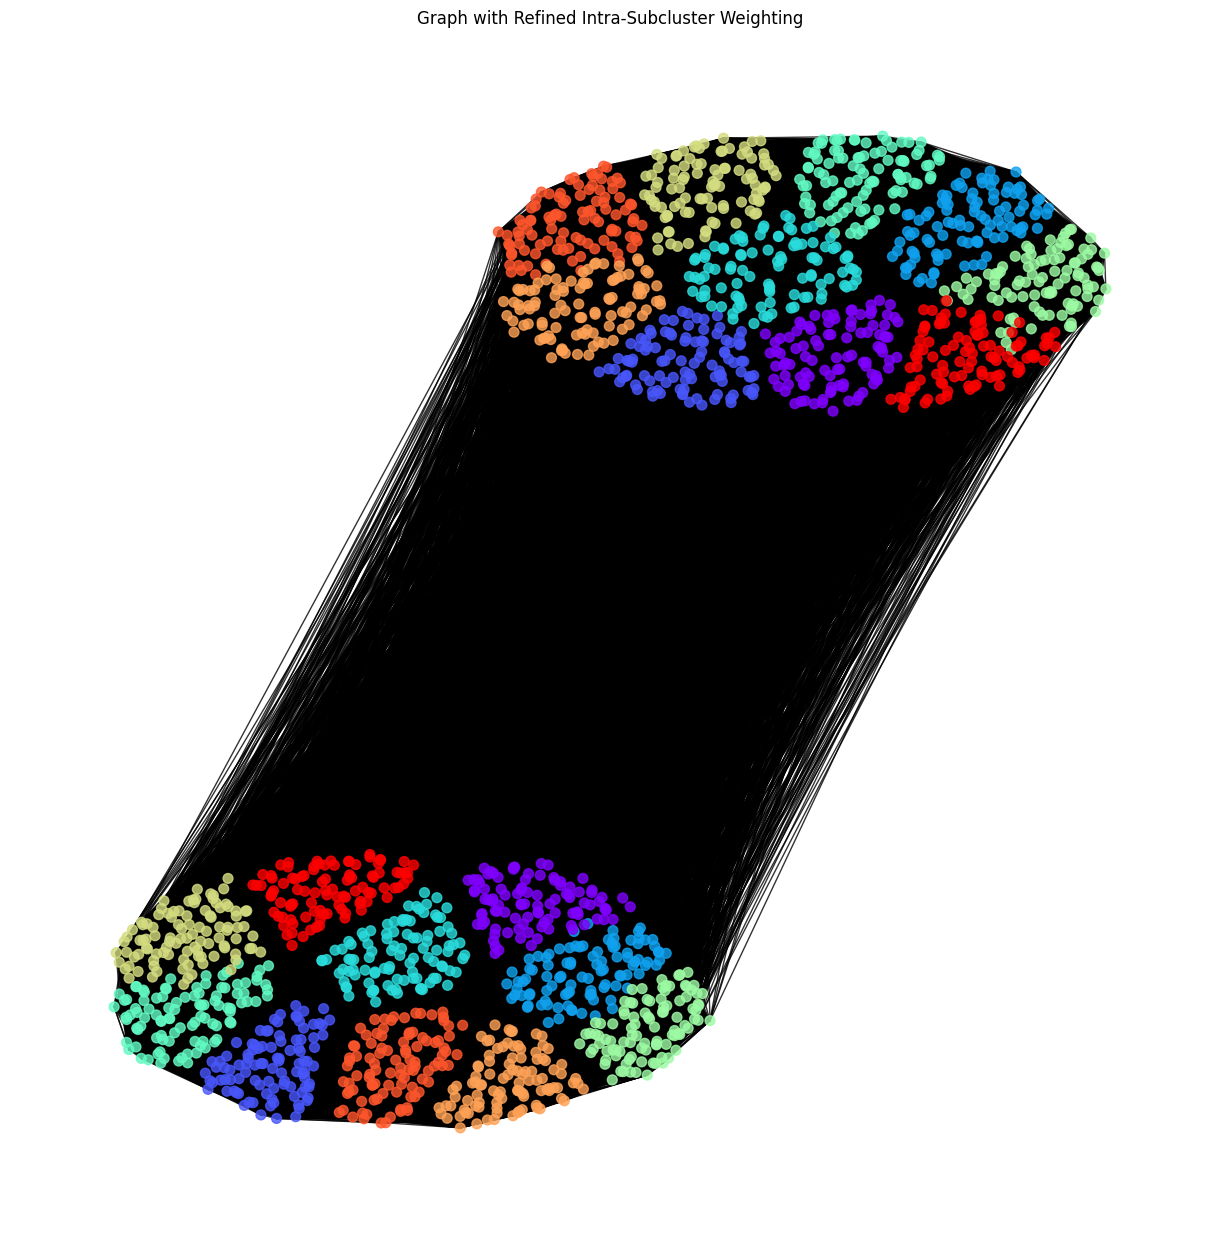

In [33]:
# Create subgraphs for the two large clusters
G1_nodes = clusters[0]  # Nodes in the first large cluster
G2_nodes = clusters[1]  # Nodes in the second large cluster

G1 = G.subgraph(G1_nodes).copy()
G2 = G.subgraph(G2_nodes).copy()

# Cluster G1 and G2 into 10 subclusters each
kmeans_G1 = KMeans(n_clusters=10, random_state=42)
labels_G1 = kmeans_G1.fit_predict(nx.adjacency_matrix(G1).toarray())

kmeans_G2 = KMeans(n_clusters=10, random_state=42)
labels_G2 = kmeans_G2.fit_predict(nx.adjacency_matrix(G2).toarray())

# Assign colors for the clusters
colors_G1 = plt.cm.rainbow(np.linspace(0, 1, 10))
colors_G2 = plt.cm.rainbow(np.linspace(0, 1, 10))

color_map = {}

# Apply the color mapping to the nodes in G1
for node, label in zip(G1.nodes(), labels_G1):
    color_map[node] = colors_G1[label]

# Apply the color mapping to the nodes in G2
for node, label in zip(G2.nodes(), labels_G2):
    color_map[node] = colors_G2[label]

# Assign weights to edges within the same subclusters in G1 and G2
for u, v in G.edges():
    if u in G1 and v in G1 and labels_G1[list(G1.nodes).index(u)] == labels_G1[list(G1.nodes).index(v)]:
        G[u][v]['weight'] = 5.0  # Higher weight for intra-subcluster edges in G1
        G1[u][v]['weight'] = 5.0  # Also modify G1
    elif u in G2 and v in G2 and labels_G2[list(G2.nodes).index(u)] == labels_G2[list(G2.nodes).index(v)]:
        G[u][v]['weight'] = 5.0  # Higher weight for intra-subcluster edges in G2
        G2[u][v]['weight'] = 5.0  # Also modify G2
    else:
        G[u][v]['weight'] = 0.5  # Lower weight for inter-subcluster edges

# Generate a spring layout considering the weights for the entire graph G
pos = nx.spring_layout(G, k=0.1, iterations=300, weight='weight')

# Visualize the full graph with the adjusted layout
plt.figure(figsize=(12, 12))
nx.draw(G, pos, node_color=[color_map[node] for node in G.nodes()], node_size=50, with_labels=False, alpha=0.8)
plt.title("Graph with Refined Intra-Subcluster Weighting")
plt.show()

### Plot each large cluster separately

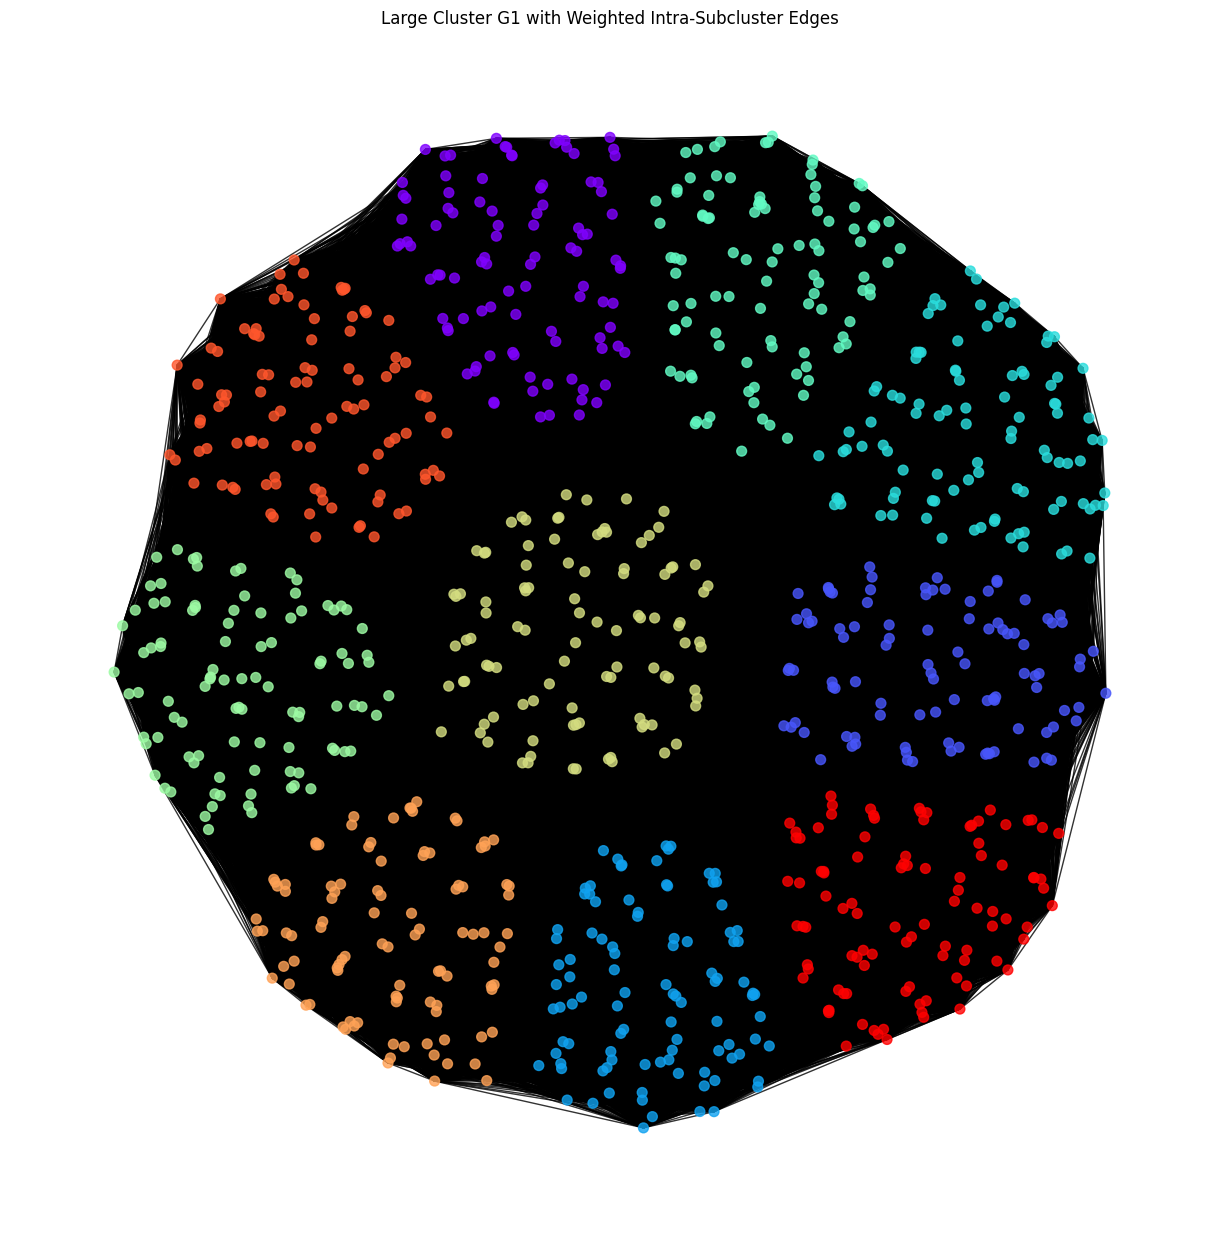

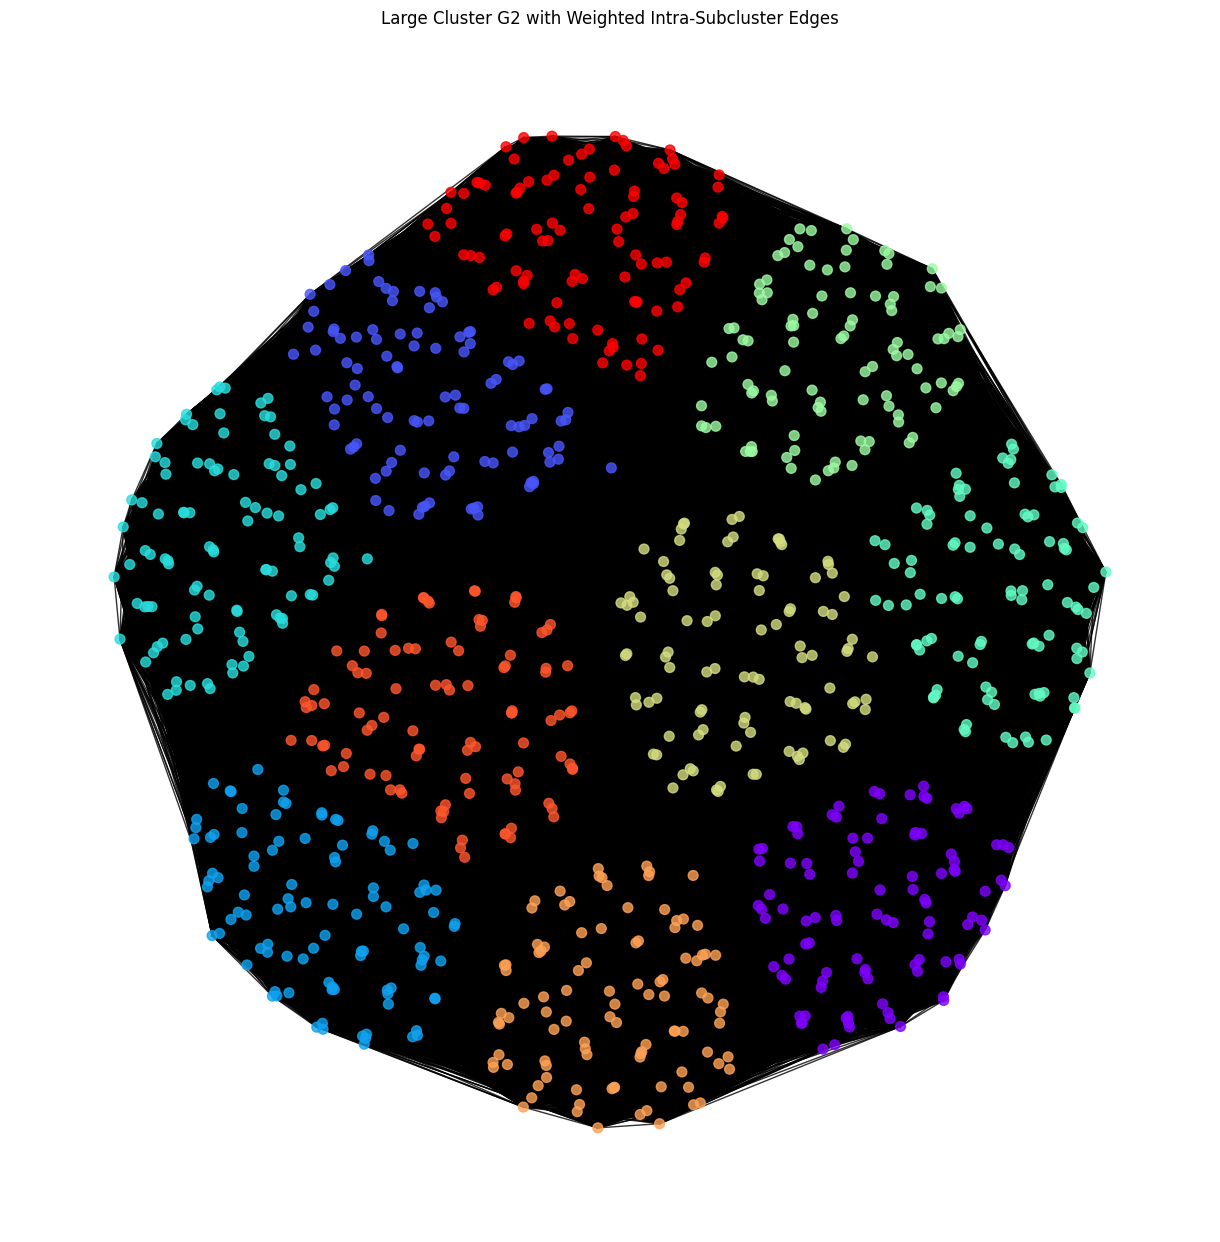

In [34]:
color_map_G1 = {node: colors_G1[label] for node, label in zip(G1.nodes(), labels_G1)}
color_map_G2 = {node: colors_G2[label] for node, label in zip(G2.nodes(), labels_G2)}


# Generate and visualize the layout for G1 separately
pos_G1 = nx.spring_layout(G1, k=0.1, iterations=300, weight='weight')
plt.figure(figsize=(12, 12))
nx.draw(G1, pos_G1, node_color=[color_map[node] for node in G1.nodes()], node_size=50, with_labels=False, alpha=0.8)
plt.title("Large Cluster G1 with Weighted Intra-Subcluster Edges")
plt.show()

# Generate and visualize the layout for G2 separately
pos_G2 = nx.spring_layout(G2, k=0.1, iterations=300, weight='weight')
plt.figure(figsize=(12, 12))
nx.draw(G2, pos_G2, node_color=[color_map[node] for node in G2.nodes()], node_size=50, with_labels=False, alpha=0.8)
plt.title("Large Cluster G2 with Weighted Intra-Subcluster Edges")
plt.show()